In [62]:
# Import libraries
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# Load Data
df = pd.read_csv('trainms.csv')

In [3]:
df.head()

,s.no,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
df.columns.values

array(['s.no', 'Timestamp', 'Age', 'Gender', 'Country', 'state',
       'self_employed', 'family_history', 'treatment', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity',
       'leave', 'mental_health_consequence', 'phys_health_consequence',
       'coworkers', 'supervisor', 'mental_health_interview',
       'phys_health_interview', 'mental_vs_physical', 'obs_consequence',
       'comments'], dtype=object)

In [5]:
# Convert time stamp column data type to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Timestamp'] = df['Timestamp'].dt.date

In [6]:
# convert invalid data to NaN
df.loc[(df['Age'] < 18) |  (df['Age'] > 80),"Age"]  = np.nan

In [7]:
df.loc[(df['Age'] < 18) |  (df['Age'] > 80),"Age"]

Series([], Name: Age, dtype: float64)

In [8]:
# 
# df['Gender'].value_counts()
M_list = ["male","m","Make","Cis Male","Man","Mal","Male-ish","maile","male leaning androgynous","msle","Mail","cis male","Malr"]
F_list = ["Female","f","woman","cis female","femake","cis-female/femme","female (cis)","femail"]
T_list = ["queer","trans-female","female (trans)","neuter","non-binary","enby","genderqueer","agender","androgyne","trans woman","fluid","ostensibly male, unsure what that really means","something kinda male?","Guy (-ish) ^_^","nah","a little about you","p"]

In [9]:
df['Gender'].str.lower().str.strip().value_counts()

male                        659
female                      139
m                           121
f                            44
make                          4
woman                         3
cis male                      3
man                           2
non-binary                    1
msle                          1
agender                       1
nah                           1
trans-female                  1
trans woman                   1
cis female                    1
mal                           1
androgyne                     1
maile                         1
guy (-ish) ^_^                1
queer                         1
neuter                        1
something kinda male?         1
a little about you            1
enby                          1
male-ish                      1
genderqueer                   1
male leaning androgynous      1
female (trans)                1
cis-female/femme              1
fluid                         1
female (cis)                  1
femake  

In [10]:
df.loc[df['Gender'].str.lower().str.strip().isin([x.lower().strip() for x in M_list]),"Gender"] = "M"
df.loc[df['Gender'].str.lower().str.strip().isin([x.lower().strip() for x in F_list]),"Gender"] = "F"
df.loc[df['Gender'].str.lower().str.strip().isin([x.lower().strip() for x in T_list]),"Gender"] = "T"
# df.loc[df['Gender'].isin([M_list]),"Gender"]="M"

In [11]:
#Set state NaN if country not United States
df.loc[(df["Country"] != "United States"),"state"] = "Other"

In [12]:
df.loc[(df["state"].isnull()),"state"] = "Other"
df.loc[(df["self_employed"].isnull()),"self_employed"] = "Other"

In [13]:
print(df["state"].value_counts())
df["self_employed"].value_counts()

Other    403
CA       119
WA        59
NY        46
TX        37
TN        36
OR        23
PA        23
OH        22
MA        20
IL        20
MI        19
IN        15
MN        14
VA        12
MO        11
GA        10
FL         9
WI         9
NC         9
CO         9
AZ         7
MD         6
UT         6
OK         5
KY         5
SC         4
DC         4
AL         4
IA         4
KS         3
NJ         3
CT         3
NV         3
NH         3
VT         2
NE         2
NM         2
WY         2
MS         1
ME         1
WV         1
ID         1
LA         1
RI         1
SD         1
Name: state, dtype: int64


No       859
Yes      123
Other     18
Name: self_employed, dtype: int64

In [14]:
df["family_history"].value_counts()

No     619
Yes    381
Name: family_history, dtype: int64

In [15]:
df["work_interfere"].value_counts()

Sometimes    362
Never        171
Rarely       142
Often         99
Name: work_interfere, dtype: int64

In [16]:
df.loc[(df["work_interfere"].isnull() ),"work_interfere"] = "Not Ill"

In [17]:
df["no_employees"].value_counts()

6-25              231
26-100            229
More than 1000    217
100-500           141
1-5               129
500-1000           53
Name: no_employees, dtype: int64

In [18]:
df["no_employees"] = df["no_employees"].apply(str)

In [19]:
df["remote_work"].value_counts()

No     706
Yes    294
Name: remote_work, dtype: int64

In [20]:
df.columns

Index(['s.no', 'Timestamp', 'Age', 'Gender', 'Country', 'state',
       'self_employed', 'family_history', 'treatment', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [21]:
df["seek_help"].value_counts()

No            508
Don't know    296
Yes           196
Name: seek_help, dtype: int64

In [22]:
df["anonymity"].value_counts()

Don't know    654
Yes           295
No             51
Name: anonymity, dtype: int64

In [23]:
df["leave"].value_counts()

Don't know            438
Somewhat easy         206
Very easy             170
Somewhat difficult    106
Very difficult         80
Name: leave, dtype: int64

In [24]:
df["mental_health_consequence"].value_counts()

No       407
Maybe    363
Yes      230
Name: mental_health_consequence, dtype: int64

In [25]:
df_c = df.copy()

In [26]:
# df_c.columns[df_c.isnull().mean() > 0.002]

In [27]:

# df_c.loc[df_c.isnull().mean(axis=1) > 0.1]

In [28]:
df_c["Age"] = df_c["Age"].fillna(df_c["Age"].median())

In [29]:
df_c["Age"].isnull().any()

False

In [30]:
df_c["Age_bin"] = pd.cut(df_c["Age"],bins=[0,27,36,45,54,100],labels=["Age1","Age2","Age3","Age4","Age5"])

In [31]:
df_c["Age_bin"].value_counts()

Age2    484
Age1    293
Age3    179
Age4     30
Age5     14
Name: Age_bin, dtype: int64

In [32]:

col_2_rem = ['Timestamp','state','comments',"Age"]
df_c.drop(col_2_rem,axis=1,inplace=True)             

In [33]:
# df_c.to_csv("clean_data_final.csv",index=False)

In [34]:
df_c.isnull().sum()

s.no                         0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
Age_bin                      0
dtype: int64

In [35]:
x_train =df_c.drop(["treatment"],axis=1)
y_train = pd.DataFrame(columns=["treatment"])
y_train["treatment"] = df_c["treatment"]
print(x_train.columns)
y_train.columns

Index(['s.no', 'Gender', 'Country', 'self_employed', 'family_history',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'Age_bin'],
      dtype='object')


Index(['treatment'], dtype='object')

In [36]:
y_train.head()

,treatment
0,Yes
1,No
2,No
3,Yes
4,No


In [37]:
# Label Encoding our target variable 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
l=LabelEncoder() 
l.fit(y_train["treatment"].values) 

LabelEncoder()

In [38]:
df_c.columns

Index(['s.no', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'Age_bin'],
      dtype='object')

In [39]:
WI = pd.get_dummies(df_c.work_interfere.astype('category'),prefix='WI',sparse=True)
FH = pd.get_dummies(df_c.family_history.astype('category'),prefix='FH',sparse=True)
CO = pd.get_dummies(df_c.care_options.astype('category'),prefix='CO')               
# C =  pd.get_dummies(df_c.Country.astype('category'),prefix='C')                              
G =  pd.get_dummies(df_c.Gender.astype('category'),prefix='G')                              
B =  pd.get_dummies(df_c.benefits.astype('category'),prefix='B')                              
CW =  pd.get_dummies(df_c.coworkers.astype('category'),prefix='CW')                              
OC = pd.get_dummies(df_c.obs_consequence.astype('category'),prefix='OC')                               
AN = pd.get_dummies(df_c.anonymity.astype('category'),prefix='AN',sparse=True)                               
LE = pd.get_dummies(df_c.leave.astype('category'),prefix='LE')                               
Pred = y_train               

In [40]:
imp_columns = ["work_interfere","family_history","care_options","Gender","benefits","coworkers","obs_consequence","anonymity","leave"]
target = "treatment"

In [41]:
df_c_OH = pd.concat([WI,FH,CO,G,B,CW,OC,AN,LE,Pred],axis=1) 


In [ ]:
x_training =df_c_OH.drop(["treatment"],axis=1)
y_training = pd.DataFrame(columns=["treatment"])
y_training["treatment"] = df_c_OH["treatment"]
print(x_training.columns)
y_training.columns

In [42]:
from sklearn.model_selection import train_test_split
training, validation = train_test_split(df_c_OH, test_size=0.3, random_state=0)
train_x = training

In [43]:
df_test = pd.read_csv("clean_final_T.csv")

In [44]:
df_test_col = df_test[imp_columns]


In [45]:
WI_T = pd.get_dummies(df_test_col.work_interfere.astype('category'),prefix='WI',sparse=True)
FH_T = pd.get_dummies(df_test_col.family_history.astype('category'),prefix='FH',sparse=True)
CO_T = pd.get_dummies(df_test_col.care_options.astype('category'),prefix='CO')               
# C =  pd.get_dummies(df_c.Country.astype('category'),prefix='C')                              
G_T =  pd.get_dummies(df_test_col.Gender.astype('category'),prefix='G')                              
B_T =  pd.get_dummies(df_test_col.benefits.astype('category'),prefix='B')                              
CW_T =  pd.get_dummies(df_test_col.coworkers.astype('category'),prefix='CW')                              
OC_T = pd.get_dummies(df_test_col.obs_consequence.astype('category'),prefix='OC')                               
AN_T = pd.get_dummies(df_test_col.anonymity.astype('category'),prefix='AN',sparse=True)                               
LE_T = pd.get_dummies(df_test_col.leave.astype('category'),prefix='LE')                               
                

In [46]:
df_c_OH_Test = pd.concat([WI_T,FH_T,CO_T,G_T,B_T,CW_T,OC_T,AN_T,LE_T],axis=1) 

In [47]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)

clf.fit(df_c_OH, y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

C:\Users\Vibhash-CRM\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Vibhash-CRM\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [48]:
pred_valid = clf.predict(validation)

In [50]:
from sklearn.metrics import f1_score
f1_model1=f1_score(validation[""],y_pred1,average='weighted',labels=np.unique(y_pred1))

In [51]:
preds=clf.predict(df_c_OH_Test)

In [52]:
preds.shape

(259,)

In [53]:
final = pd.DataFrame(columns=["s.no","treatment"])
final["s.no"] = df_test["s.no"]
final["treatment"] = preds
final.to_csv("solution_h2O_final_RF.csv",index=False)

In [ ]:
from sklearn import tree
import graphviz

outfile = 'ourtree.dot'
dot_data = tree.export_graphviz(clf, out_file=outfile,
                                feature_names=df_c_OH.columns,  
                                class_names=['0','1','2','3','4'],  
                                filled=True, rounded=True, max_depth=4, 
                                special_characters=True) 

In [56]:
import numpy as np
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)

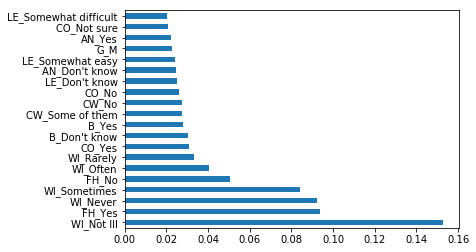

In [63]:
feat_importances = pd.Series(clf.feature_importances_, index=df_c_OH.columns)
feat_importances.nlargest(20).plot(kind='barh')